# <u>Group 1</u>
### Project 
   Motor Insurance Claims <br>
   Solution

### Team members:
<table align="left" style="font-size: 1em;" >
    <tr>
        <td>Jigyasu Saini</td>
        <td>jigyashusaini7@gmail.com</td>
    </tr>
     <tr>
        <td>Prateek Advani</td>
        <td>prateekadvani7@gmail.com</td>
    </tr>
     <tr>
        <td>Simran Gupta</td>
        <td>simrungupta98@gmail.com</td>
    </tr>
     <tr>
        <td>Priyanka Mahto</td>
        <td>friendmahto12345@gmail.com</td>
    </tr>
</table>

#### The data gives the details of third party motor insurance claims in Sweden for the year 1977. In Sweden, all motor insurance companies apply identical risk arguments to classify customers, and thus their portfolios and their claims statistics can be combined. The data were compiled by a Swedish Committee on the Analysis of Risk Premium in Motor Insurance. The Committee was asked to look into the problem of analyzing the real influence on the claims of the risk arguments and to compare this structure with the actual tariff.

In [2]:
# importing the pandas as pd to read the provided csv file and to perform some basis operation on it
import pandas as pd

# reading the provided data into insuranceData variable
insuranceData = pd.read_csv("Project 4_Insurance_factor_identification.csv")
insuranceData

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373
...,...,...,...,...,...,...,...
2177,5,7,7,5,8.74,0,0
2178,5,7,7,6,16.61,0,0
2179,5,7,7,7,2.83,1,966
2180,5,7,7,8,13.06,0,0


### The committee is interested to know each field of the data collected through descriptive analysis to gain basic insights into the data set and to prepare for further analysis.

In [3]:
# performing descriptive analysis
print("Dimensions:",insuranceData.shape)
print("Description:")
insuranceData.describe()

# Conclusion:
# count is alike for all the variable, means data does not contains any missing field
# max, min, mean, std values of various variables
# the given data has 2182 rows(observations) and 7 columns(variables)

Dimensions: (2182, 7)
Description:


,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2.182000e+03
mean,2.985793,3.970211,4.015124,4.991751,1092.195270,51.865720,2.570076e+05
std,1.410409,1.988858,2.000516,2.586943,5661.156245,201.710694,1.017283e+06
min,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000e+00
25%,2.000000,2.000000,2.000000,3.000000,21.610000,1.000000,2.988750e+03
50%,3.000000,4.000000,4.000000,5.000000,81.525000,5.000000,2.740350e+04
75%,4.000000,6.000000,6.000000,7.000000,389.782500,21.000000,1.119538e+05
max,5.000000,7.000000,7.000000,9.000000,127687.270000,3338.000000,1.824503e+07


### The total value of payment by an insurance company is an important factor to be monitored. So the committee has decided to find whether this payment is related to the number of claims and the number of insured policy years. They also want to visualize the results for better understanding.

In [4]:
# in order to comment over the relations between payment and other variables, we need to find the correlation between them
print("The correlation coefficient values of (Payment and Insured) and (Payment and Claims) ")
insuranceData.corr().iloc[[6],[4,5]]

The correlation coefficient values of (Payment and Insured) and (Payment and Claims) 


,Insured,Claims
Payment,0.933217,0.9954


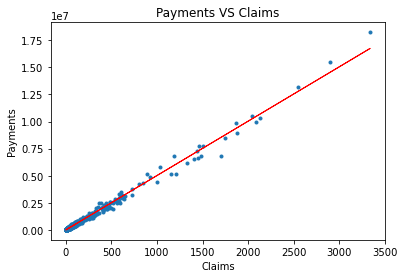

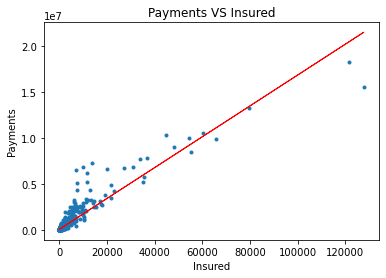

In [5]:
# in order to represent this visually, we shall draw regression line and scatter ploat
import matplotlib.pyplot as plt
import statsmodels.formula.api as smapi
modelClaims = smapi.ols(formula='Payment ~ Claims',data=insuranceData).fit()
modelInsured = smapi.ols(formula='Payment ~ Insured',data=insuranceData).fit()

plt.plot(insuranceData['Claims'],insuranceData['Payment'],'.')
plt.plot(insuranceData['Claims'],modelClaims.predict(),'r',linewidth=1)
plt.ylabel('Payments')
plt.xlabel('Claims')
plt.title('Payments VS Claims')
plt.show()


plt.plot(insuranceData['Insured'],insuranceData['Payment'],'.')
plt.plot(insuranceData['Insured'],modelInsured.predict(),'r',linewidth=1)
plt.ylabel('Payments')
plt.xlabel('Insured')
plt.title('Payments VS Insured')
plt.show()



In [6]:
# Conclusion:
# we can see that the value of Correlation Coefficient is very close to positive 1, means payment is strongly and positively
#     related to the Insured and Claims
# we can visualise it using the regression line as shown above.


### The committee wants to figure out the reasons for insurance payment increase and decrease. So they have decided to find whether distance, location, bonus, make, and insured amount or claims are affecting the payment of all or some of these are affecting it.

In [12]:
# Independent variable: insured, claims, make, bonus, zone, and kilometers
# Dependent variable: payment

# we need to analyse the pValues in order to comment
import statsmodels.formula.api as smapi
model1 = smapi.ols(formula='Payment ~ Kilometres + Zone + Bonus + Make + Insured + Claims',data=insuranceData).fit()
print (model1.summary());

                            OLS Regression Results                            
Dep. Variable:                Payment   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.462e+04
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:56:32   Log-Likelihood:                -27461.
No. Observations:                2182   AIC:                         5.494e+04
Df Residuals:                    2175   BIC:                         5.498e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.173e+04   6338.112     -3.429      0.0

In [ ]:
#importing library to plot regression graph

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
## prediction
pred = model1.predict()

In [ ]:
pred

In [91]:
x=insuranceData.drop(['Payment'],axis=1).values
y=insuranceData['Payment'].values
x

array([[  1.  ,   1.  ,   1.  ,   1.  , 455.13, 108.  ],
       [  1.  ,   1.  ,   1.  ,   2.  ,  69.17,  19.  ],
       [  1.  ,   1.  ,   1.  ,   3.  ,  72.88,  13.  ],
       ...,
       [  5.  ,   7.  ,   7.  ,   7.  ,   2.83,   1.  ],
       [  5.  ,   7.  ,   7.  ,   8.  ,  13.06,   0.  ],
       [  5.  ,   7.  ,   7.  ,   9.  , 384.87,  16.  ]])

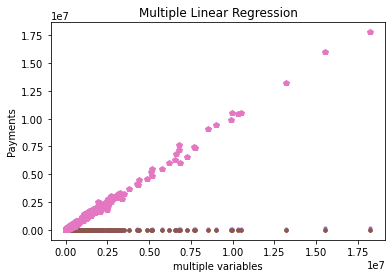

In [94]:
## plotting the graph
plt.plot(y,x,'.')
plt.plot(y,pred,'p',linewidth=1)
plt.ylabel('Payments')
plt.xlabel('multiple variables')
plt.title('Multiple Linear Regression')
plt.show()

From this we can see the regression graph and this would help us predict the payment values. The high p value of make and bonus show they do not make much influence on the payment. 

In [9]:
# Conclusion:
# On the basis of 'pValue', we can state that else than 'bonus' and 'make', all other variables are significant(pValue < 0.05)

### The insurance company is planning to establish a new branch office, so they are interested to find at what location, kilometer, and bonus level their insured amount, claims, and payment gets increased. 

In [10]:
# for the location
# we have 7 locations
# we want to have mean of insured claims payment respectively wrt location
print(insuranceData.drop(['Make','Kilometres','Bonus'], axis=1).groupby('Zone').mean())

print("\n")

# for the Kilometres
# we have 5 categories for Kilometers
# we want to have mean of insured claims payment respectively wrt Kilometers
print(insuranceData.drop(['Make','Zone','Bonus'], axis=1).groupby('Kilometres').mean())

print("\n")

# for the Bonus
# we have 7 Bonus values
# we want to have mean of insured claims payment respectively wrt Bonus
print(insuranceData.drop(['Make','Zone','Kilometres'], axis=1).groupby('Bonus').mean())

          Insured      Claims        Payment
Zone                                        
1     1036.171746   73.568254  338518.946032
2     1231.481841   67.625397  319921.517460
3     1362.958698   63.295238  307550.853968
4     2689.380413  101.311111  537071.755556
5      384.801885   19.047923   93001.843450
6      802.684571   32.577778  175528.469841
7       64.910714    2.108844    9948.190476


                Insured     Claims        Payment
Kilometres                                       
1           1837.816287  75.594533  361899.350797
2           1824.028844  89.276644  442523.780045
3           1081.971383  54.160998  272012.582766
4            398.963226  20.794931  108213.405530
5            284.947518  18.042155   93306.117096


           Insured      Claims        Payment
Bonus                                        
1       525.550195   62.504886  282921.993485
2       451.075449   34.233974  163316.625000
3       397.473742   24.974194  122656.174194
4       360

In [ ]:
# Conclusions:
# Zone 4 has the highest Insured, claims and Payments
# Kilometres 2 has the highest Payment and Claims though the Insured is lesser than the Kilometres 1
# Bonus 7 has the highest value for the Insure, Claims as well as for Payments.

### The committee wants to understand what affects their claim rates to decide the right premiums for a certain set of situations. Hence, they need to find whether the insured amount, zone, kilometer, bonus, or make affects the claim rates and to what extent.

In [97]:
# Independent variable: insured, make, bonus, zone, and kilometers
# Dependent variable: Claims

# we need to analyse the pValues in order to comment
import statsmodels.formula.api as smapi
model1 = smapi.ols(formula='Claims ~ Kilometres + Zone + Bonus + Make + Insured ',data=insuranceData).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Claims   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2328.
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:18:52   Log-Likelihood:                -12659.
No. Observations:                2182   AIC:                         2.533e+04
Df Residuals:                    2176   BIC:                         2.536e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1230      7.127      5.209      0.000      23.146      51.100
Kilometres    -3.9649      1.226     -3.235      0.001      -6.368      -1.562
Zone          -6.2924      0.865     -7.277      0.000      -7.988      -4.597
Bonus         -4.2468      0.871     -4.877      0.000      -5.954      -2.539
Make           6.7725      0.676     10.025      0.000       5.448       8.097
Insured        0.0319      0.000    100.933      0.000       0.031       0.032
==============================================================================
Omnibus:                     2561.874   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1103060.709
Skew:                           5.491   Prob(JB):                         0.00
Kurtosis:                     112.599   Cond. No.                     2.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# conslusion:
# we can see that all the variables are significant wrt the Claims (pValues < 0.05)

In [99]:
##importing library to plot the regression line graph

In [100]:
import matplotlib.pyplot as plt

In [101]:
##predicting the values

In [102]:
pred = model1.predict()

In [103]:
pred

array([43.89628154, 38.36839611, 45.25916676, ..., -8.97804891,
       -1.87948799, 16.74250987])

In [104]:
x=insuranceData.drop(['Claims'],axis=1)
x=insuranceData.drop(['Payment'],axis=1).values
y=insuranceData['Claims'].values

In [105]:
import matplotlib.pyplot as plt

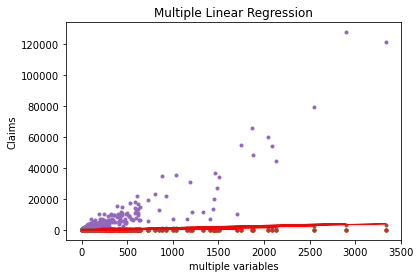

In [106]:
### plotting the graph
plt.plot(y,x,'.')
plt.plot(y,pred,'r',linewidth=1)
plt.ylabel('Claims')
plt.xlabel('multiple variables')
plt.title('Multiple Linear Regression')
plt.show()

here , we see all the P values are significantly high hence we can assume that kilometer, zone , insured, bonus , make are making impacts on claims. 